<a href="https://colab.research.google.com/github/Sagu12/all-projects/blob/master/Energy_usage_in_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install pyforest

In [55]:
from pyforest import *

In [56]:
df= pd.read_csv("/content/long_data_.csv")
df.head()

<IPython.core.display.Javascript object>

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [57]:
df.dtypes

States        object
Regions       object
latitude     float64
longitude    float64
Dates         object
Usage        float64
dtype: object

In [58]:
df["Dates"]= pd.to_datetime(df.Dates)

<IPython.core.display.Javascript object>

In [59]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,2019-02-01,119.9
1,Haryana,NR,28.450006,77.019991,2019-02-01,130.3
2,Rajasthan,NR,26.449999,74.639981,2019-02-01,234.1
3,Delhi,NR,28.669993,77.230004,2019-02-01,85.8
4,UP,NR,27.599981,78.050006,2019-02-01,313.9


In [60]:
df.dtypes

States               object
Regions              object
latitude            float64
longitude           float64
Dates        datetime64[ns]
Usage               float64
dtype: object

In [61]:
df.Dates.dt.month_name()

0        February
1        February
2        February
3        February
4        February
           ...   
16594         May
16595         May
16596         May
16597         May
16598         May
Name: Dates, Length: 16599, dtype: object

In [62]:
g=df.groupby(by="States")

In [63]:
g

In [64]:
for state, state_df in g:
  print(state)
  print(state_df)

Andhra Pradesh
               States Regions   latitude  longitude      Dates  Usage
15     Andhra Pradesh      SR  14.750429  78.570026 2019-02-01  164.6
48     Andhra Pradesh      SR  14.750429  78.570026 2019-03-01  170.1
81     Andhra Pradesh      SR  14.750429  78.570026 2019-04-01  165.2
114    Andhra Pradesh      SR  14.750429  78.570026 2019-05-01  167.4
147    Andhra Pradesh      SR  14.750429  78.570026 2019-06-01  171.2
...               ...     ...        ...        ...        ...    ...
16449  Andhra Pradesh      SR  14.750429  78.570026 2020-01-12  196.5
16482  Andhra Pradesh      SR  14.750429  78.570026 2020-02-12  197.6
16515  Andhra Pradesh      SR  14.750429  78.570026 2020-03-12  197.3
16548  Andhra Pradesh      SR  14.750429  78.570026 2020-04-12  186.1
16581  Andhra Pradesh      SR  14.750429  78.570026 2020-05-12  181.9

[503 rows x 6 columns]
Arunachal Pradesh
                  States Regions   latitude  longitude      Dates  Usage
26     Arunachal Pradesh     N

In [65]:
punjab=g.get_group("Punjab")

In [66]:
punjab.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,2019-02-01,119.9
33,Punjab,NR,31.519974,75.980003,2019-03-01,121.9
66,Punjab,NR,31.519974,75.980003,2019-04-01,118.8
99,Punjab,NR,31.519974,75.980003,2019-05-01,121.0
132,Punjab,NR,31.519974,75.980003,2019-06-01,121.4


In [67]:
punjab.tail()

,States,Regions,latitude,longitude,Dates,Usage
16434,Punjab,NR,31.519974,75.980003,2020-01-12,130.8
16467,Punjab,NR,31.519974,75.980003,2020-02-12,129.4
16500,Punjab,NR,31.519974,75.980003,2020-03-12,132.1
16533,Punjab,NR,31.519974,75.980003,2020-04-12,132.1
16566,Punjab,NR,31.519974,75.980003,2020-05-12,120.4


#A line plot to depict the power consumption of Punjab

<IPython.core.display.Javascript object>

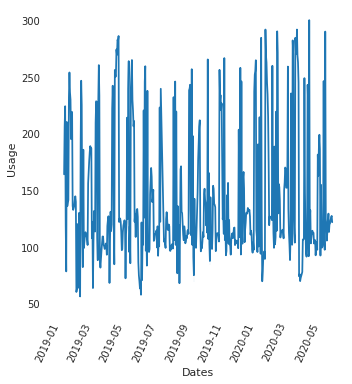

In [68]:
ax=sns.relplot(x="Dates",y="Usage", data=punjab, kind="line", markers=True)
for axes in ax.axes.flat:
  axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')

#Scatter plot

In [69]:
from bokeh.models import HoverTool
import bokeh

from bokeh.io import output_notebook, reset_output, show

from bokeh.plotting import figure

import numpy as np
import pandas as pd
from vega_datasets import data as vds

output_notebook()

from bokeh.models import ColumnDataSource

In [70]:
line_plot= figure(plot_width=700, plot_height=300, title="line plot", x_axis_label="Dates", y_axis_label= "Usage", toolbar_location="below")

line_plot.line(df.Dates,df.Usage, legend_label="line")

line_plot.add_tools(HoverTool())

show(line_plot)

Above we can see the power consumption of all states for the 2019 and 2020. Hovering on the scatter points will give the value of the power for a particular date

In [71]:
punjab=punjab.reset_index()

In [72]:
punjab.head()

,index,States,Regions,latitude,longitude,Dates,Usage
0,0,Punjab,NR,31.519974,75.980003,2019-02-01,119.9
1,33,Punjab,NR,31.519974,75.980003,2019-03-01,121.9
2,66,Punjab,NR,31.519974,75.980003,2019-04-01,118.8
3,99,Punjab,NR,31.519974,75.980003,2019-05-01,121.0
4,132,Punjab,NR,31.519974,75.980003,2019-06-01,121.4


#Bar plot of all state power usage

<IPython.core.display.Javascript object>

[Text(0, 0, 'Punjab'),
 Text(0, 0, 'Haryana'),
 Text(0, 0, 'Rajasthan'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'UP'),
 Text(0, 0, 'Uttarakhand'),
 Text(0, 0, 'HP'),
 Text(0, 0, 'J&K'),
 Text(0, 0, 'Chandigarh'),
 Text(0, 0, 'Chhattisgarh'),
 Text(0, 0, 'Gujarat'),
 Text(0, 0, 'MP'),
 Text(0, 0, 'Maharashtra'),
 Text(0, 0, 'Goa'),
 Text(0, 0, 'DNH'),
 Text(0, 0, 'Andhra Pradesh'),
 Text(0, 0, 'Telangana'),
 Text(0, 0, 'Karnataka'),
 Text(0, 0, 'Kerala'),
 Text(0, 0, 'Tamil Nadu'),
 Text(0, 0, 'Pondy'),
 Text(0, 0, 'Bihar'),
 Text(0, 0, 'Jharkhand'),
 Text(0, 0, 'Odisha'),
 Text(0, 0, 'West Bengal'),
 Text(0, 0, 'Sikkim'),
 Text(0, 0, 'Arunachal Pradesh'),
 Text(0, 0, 'Assam'),
 Text(0, 0, 'Manipur'),
 Text(0, 0, 'Meghalaya'),
 Text(0, 0, 'Mizoram'),
 Text(0, 0, 'Nagaland'),
 Text(0, 0, 'Tripura')]

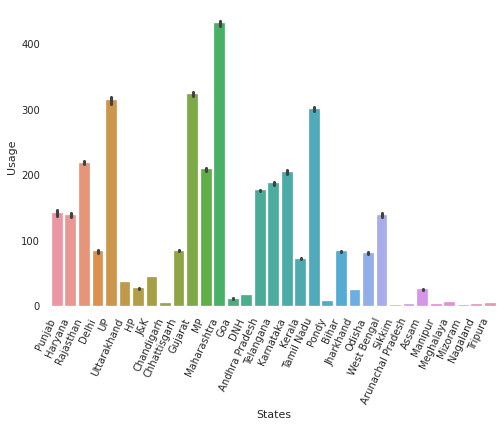

In [73]:
ax=sns.barplot(x="States", y="Usage", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')

Above we can see the total power usage of the states in Million Units.

Also it can be seen that Maharashtra is the state with the highest power consumption both for 2019 and 2020

In [74]:
df.columns

Index(['States', 'Regions', 'latitude', 'longitude', 'Dates', 'Usage'], dtype='object')

In [75]:
df.dtypes

States               object
Regions              object
latitude            float64
longitude           float64
Dates        datetime64[ns]
Usage               float64
dtype: object

In [76]:
df2= pd.read_csv("/content/dataset_tk.csv")

df2.head()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,Andhra Pradesh,Telangana,Karnataka,Kerala,Tamil Nadu,Pondy,Bihar,Jharkhand,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,319.5,253.0,428.6,12.8,18.6,164.6,204.2,206.3,72.7,268.3,6.3,82.3,24.8,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,316.7,253.6,419.6,13.7,18.2,170.1,204.5,212.2,73.6,285.2,6.5,82.0,25.6,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,301.9,239.3,395.8,12.6,16.7,165.2,201.2,205.3,73.4,270.3,6.4,82.9,26.3,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,313.2,228.2,411.1,13.0,17.6,167.4,201.7,212.4,75.4,286.8,6.6,77.0,23.0,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,320.7,227.4,408.6,12.9,18.6,171.2,194.9,217.5,75.4,298.3,7.2,76.4,22.6,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [77]:
df2.columns

Index(['Unnamed: 0', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP',
       'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'MP', 'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand',
       'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype='object')

In [78]:
df2["Dates"]= df2["Unnamed: 0"]

In [79]:
df2.head()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,Andhra Pradesh,Telangana,Karnataka,Kerala,Tamil Nadu,Pondy,Bihar,Jharkhand,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,Dates
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,319.5,253.0,428.6,12.8,18.6,164.6,204.2,206.3,72.7,268.3,6.3,82.3,24.8,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4,02/01/2019 00:00:00
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,316.7,253.6,419.6,13.7,18.2,170.1,204.5,212.2,73.6,285.2,6.5,82.0,25.6,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6,03/01/2019 00:00:00
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,301.9,239.3,395.8,12.6,16.7,165.2,201.2,205.3,73.4,270.3,6.4,82.9,26.3,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5,04/01/2019 00:00:00
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,313.2,228.2,411.1,13.0,17.6,167.4,201.7,212.4,75.4,286.8,6.6,77.0,23.0,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5,05/01/2019 00:00:00
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,320.7,227.4,408.6,12.9,18.6,171.2,194.9,217.5,75.4,298.3,7.2,76.4,22.6,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3,06/01/2019 00:00:00


In [80]:
df2= df2.drop("Unnamed: 0", axis=1)

In [81]:
df2.tail()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,Andhra Pradesh,Telangana,Karnataka,Kerala,Tamil Nadu,Pondy,Bihar,Jharkhand,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,Dates
498,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,100.4,370.5,208.1,494.1,12.0,18.1,196.5,227.7,248.6,86.4,357.3,8.5,82.9,26.3,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4,01/12/2020 00:00:00
499,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,101.8,377.4,209.8,492.8,12.0,18.2,197.6,219.5,246.5,84.7,356.9,8.5,85.0,25.2,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3,02/12/2020 00:00:00
500,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,103.0,379.8,205.2,472.8,12.0,18.4,197.3,212.5,242.8,83.9,355.1,8.7,85.4,24.0,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6,03/12/2020 00:00:00
501,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,101.8,377.2,203.3,475.3,12.0,18.2,186.1,207.2,226.7,85.1,353.5,8.6,70.0,19.3,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3,04/12/2020 00:00:00
502,120.4,111.2,201.4,83.6,287.3,35.2,24.3,42.6,3.5,102.4,362.5,200.1,470.5,12.0,18.4,181.9,197.0,218.6,78.7,323.7,7.9,61.7,17.7,95.1,110.4,1.2,2.1,20.3,2.5,5.8,1.6,2.1,3.3,05/12/2020 00:00:00


In [82]:
profile2 = ProfileReport(df2, title='power stats', html={'style':{'full_width':False}})


In [83]:
#profile2.to_file("power_output.html")

In [84]:
df2= df2.set_index("Dates")

In [85]:
df2.head()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,Andhra Pradesh,Telangana,Karnataka,Kerala,Tamil Nadu,Pondy,Bihar,Jharkhand,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
Dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,319.5,253.0,428.6,12.8,18.6,164.6,204.2,206.3,72.7,268.3,6.3,82.3,24.8,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,316.7,253.6,419.6,13.7,18.2,170.1,204.5,212.2,73.6,285.2,6.5,82.0,25.6,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,301.9,239.3,395.8,12.6,16.7,165.2,201.2,205.3,73.4,270.3,6.4,82.9,26.3,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,313.2,228.2,411.1,13.0,17.6,167.4,201.7,212.4,75.4,286.8,6.6,77.0,23.0,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,320.7,227.4,408.6,12.9,18.6,171.2,194.9,217.5,75.4,298.3,7.2,76.4,22.6,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


#Dividing the regions into NR,SR,ER,WR,NER

In [86]:
df2['NR'] = df2['Punjab']+ df2['Haryana']+ df2['Rajasthan']+ df2['Delhi']+df2['UP']+df2['Uttarakhand']+df2['HP']+df2['J&K']+df2['Chandigarh']
df2['WR'] = df2['Chhattisgarh']+df2['Gujarat']+df2['MP']+df2['Maharashtra']+df2['Goa']+df2['DNH']
df2['SR'] = df2['Andhra Pradesh']+df2['Telangana']+df2['Karnataka']+df2['Kerala']+df2['Tamil Nadu']+df2['Pondy']
df2['ER'] = df2['Bihar']+df2['Jharkhand']+ df2['Odisha']+df2['West Bengal']+df2['Sikkim']
df2['NER'] =df2['Arunachal Pradesh']+df2['Assam']+df2['Manipur']+df2['Meghalaya']+df2['Mizoram']+df2['Nagaland']+df2['Tripura']

In [87]:
df2.head()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,Andhra Pradesh,Telangana,Karnataka,Kerala,Tamil Nadu,Pondy,Bihar,Jharkhand,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,NR,WR,SR,ER,NER
Dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,319.5,253.0,428.6,12.8,18.6,164.6,204.2,206.3,72.7,268.3,6.3,82.3,24.8,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4,1012.2,1111.2,922.4,287.5,40.1
03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,316.7,253.6,419.6,13.7,18.2,170.1,204.5,212.2,73.6,285.2,6.5,82.0,25.6,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6,1021.3,1100.6,952.1,287.6,42.1
04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,301.9,239.3,395.8,12.6,16.7,165.2,201.2,205.3,73.4,270.3,6.4,82.9,26.3,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5,1017.2,1041.1,921.8,284.0,40.0
05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,313.2,228.2,411.1,13.0,17.6,167.4,201.7,212.4,75.4,286.8,6.6,77.0,23.0,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5,991.0,1052.1,950.3,274.8,40.7
06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,320.7,227.4,408.6,12.9,18.6,171.2,194.9,217.5,75.4,298.3,7.2,76.4,22.6,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3,985.5,1056.3,964.5,270.3,40.3


In [88]:
df2["NR"].values

array([1012.2, 1021.3, 1017.2,  991. ,  985.5,  984.8,  945.7,  928.5,
        962.8,  918.9,  970.6,  963.1,  983.5,  976.5, 1216.7, 1294.9,
       1293.9, 1303.9, 1250.9, 1215.3, 1227. , 1136.7, 1159.9, 1159.5,
       1104.3, 1068.5, 1128.6, 1077.4,  597.5,  610. ,  622.6,  638. ,
        653.3,  653.7,  650.7,  769.7,  820.9,  867.2,  887.1,  898.7,
        884.4,  836. ,  909.9,  929.9,  949.2,  939. ,  923.4,  929.9,
        899.2, 1235.1, 1277.4, 1305.7, 1346.6, 1342.3, 1332.7, 1323.6,
        942.7,  926.2,  932.2,  938.2,  962.6,  950. ,  926.2, 1245.1,
       1340.5, 1384.2, 1384.9, 1368.4, 1385.4, 1260.8,  709.6,  684.3,
        750.9,  809.9,  839.2,  842.1,  865. ,  864.9,  860.8,  852.6,
        813.1,  835.9,  834.8,  794.3,  909.9,  916.5,  942.2,  944. ,
        975.4,  979.9,  915.9,  888.9,  886.8,  868.8,  868.8,  915.6,
        881.8,  797.8, 1317.8, 1361.8, 1423.6, 1438.7, 1471.8, 1482.5,
       1447.1,  922.9,  922.1,  932.9,  921. ,  938.2,  857.5,  802.1,
      

#Another demonstration of Punjab power statistics

In [89]:
import plotly.graph_objects as go
fig = go.Figure( go.Scatter(x=df2.index, y=df2["Punjab"]))
fig.show()


In [90]:
df_new = pd.DataFrame({"Northern Region": df2["NR"].values,
                        "Southern Region": df2["SR"].values,
                        "Eastern Region": df2["ER"].values,
                        "Western Region": df2["WR"].values,
                        "North Eastern Region": df2["NER"].values},index=df2.index)


In [91]:
df_new.head()

,Northern Region,Southern Region,Eastern Region,Western Region,North Eastern Region
Dates,,,,,
02/01/2019 00:00:00,1012.2,922.4,287.5,1111.2,40.1
03/01/2019 00:00:00,1021.3,952.1,287.6,1100.6,42.1
04/01/2019 00:00:00,1017.2,921.8,284.0,1041.1,40.0
05/01/2019 00:00:00,991.0,950.3,274.8,1052.1,40.7
06/01/2019 00:00:00,985.5,964.5,270.3,1056.3,40.3


#Power consumption in the Northern Region for 2019 and 2020

In [98]:
fig2 = go.Figure( go.Scatter(x=df_new.index, y=df_new["Northern Region"],fillcolor=None))
fig2.show()

#Power consumption in the Southern Region

In [109]:
fig3 = go.Figure( go.Scatter(x=df_new.index, y=df_new["Southern Region"],fillcolor=None))
fig3.show()

#Power consumption in the Eastern Region

In [136]:
fig4 = go.Figure( go.Scatter(x=df_new.index, y=df_new["Eastern Region"],fillcolor=None))
fig4.show()

#Power consumption in the Western Region

In [138]:
fig5 = go.Figure( go.Scatter(x=df_new.index, y=df_new["Western Region"],fillcolor=None))
fig5.show()

#Power consumption in North Eastern Region


In [141]:
fig6 = go.Figure( go.Scatter(x=df_new.index, y=df_new["North Eastern Region"],fillcolor=None))
fig6.show()

#Comparision of Northern and Southern Region

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

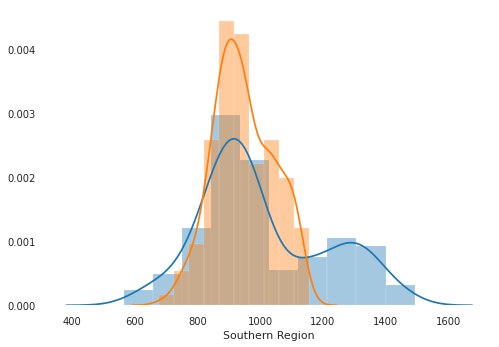

In [156]:
sns.distplot(df_new["Northern Region"], bins=10)
sns.distplot(df_new["Southern Region"], bins=10)

#Comparision of Eastern and Western Region

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

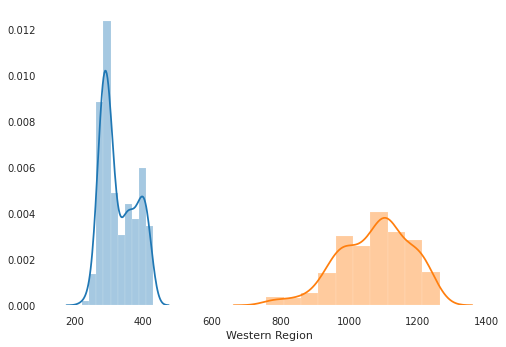

In [150]:
sns.distplot(df_new["Eastern Region"], bins=10)
sns.distplot(df_new["Western Region"], bins=10)

#Bar graph to depict North Eastern Region probability distribution

<IPython.core.display.Javascript object>

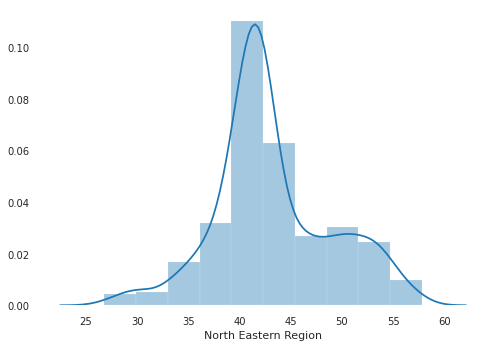

In [151]:
sns.distplot(df_new["North Eastern Region"], bins=10)

#A pairplot to show the usage according to the latitude and longitude of the region

<IPython.core.display.Javascript object>

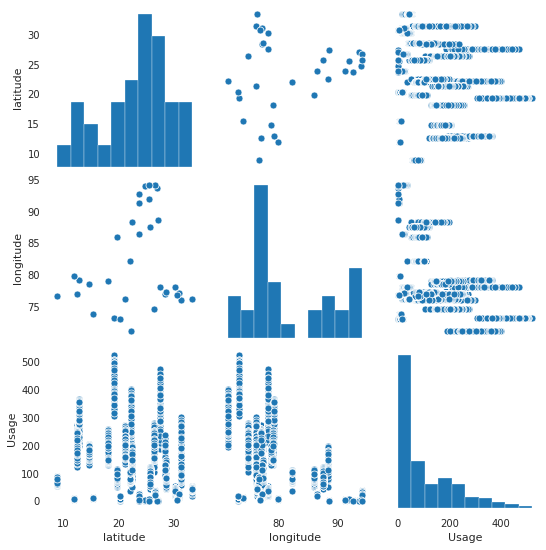

In [119]:
sns.pairplot(df)

#Correlation matrix to show the relation between different regions

<IPython.core.display.Javascript object>

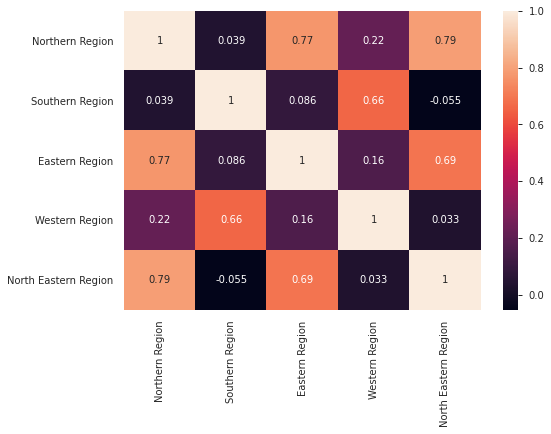

In [120]:
sns.heatmap(df_new.corr(),annot=True)

#Descriptive  Statistics through Pandas Profiling

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [94]:
from pandas_profiling import ProfileReport

In [139]:
profile = ProfileReport(df, title='Power Stats', html={'style':{'full_width':False}})

In [ ]:
profile.to_widgets()

In [97]:
profile

In [158]:
#x=df.loc[df["Dates"]>"2020-02-01"]